<a href="https://www.kaggle.com/code/kunchamanjula/linkedin-jobs-and-skills-eda-project-6?scriptVersionId=171725787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**HELLO all :) thankyou for visting my notebook .
* please give an upvote if it is useful to you and also give me your valuable feedback on this notes
* thankyou all:)


# LINKEDIN JOBS AND SKILLS EDA AND VISUVALIZATON

# import libraries

In [1]:
import numpy as np  #for numeric operations
import pandas as pd #to analyse,clean,filter,manipulate ,explore datasets
import matplotlib.pyplot as plt #Data visuvalization and analysis
%matplotlib inline
import seaborn as sns #for advance visuvalizations with matplotlib
from IPython.display import Image  #importing libary to display the image
import os #import operating system to direct the folders
import datetime # datetime is useful to date_time series analysis

# ignore warnings:

In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

# LINKEDIN:
LinkedIn is a business and employment-focused social media platform that works through websites and mobile apps. It was launched on May 5, 2003 by Reid Hoffman and Eric Ly.
The platform is primarily used for professional networking and career development, and allows jobseekers to post their CVs and employers to post jobs. 
LinkedIn allows members (both workers and employers) to create profiles and connect with each other in an online social network which may represent real-world professional relationships. Members can invite anyone (whether an existing member or not) to become a connection. LinkedIn can also be used to organize offline events, join groups, write articles, publish job postings, post photos and videos, and more.

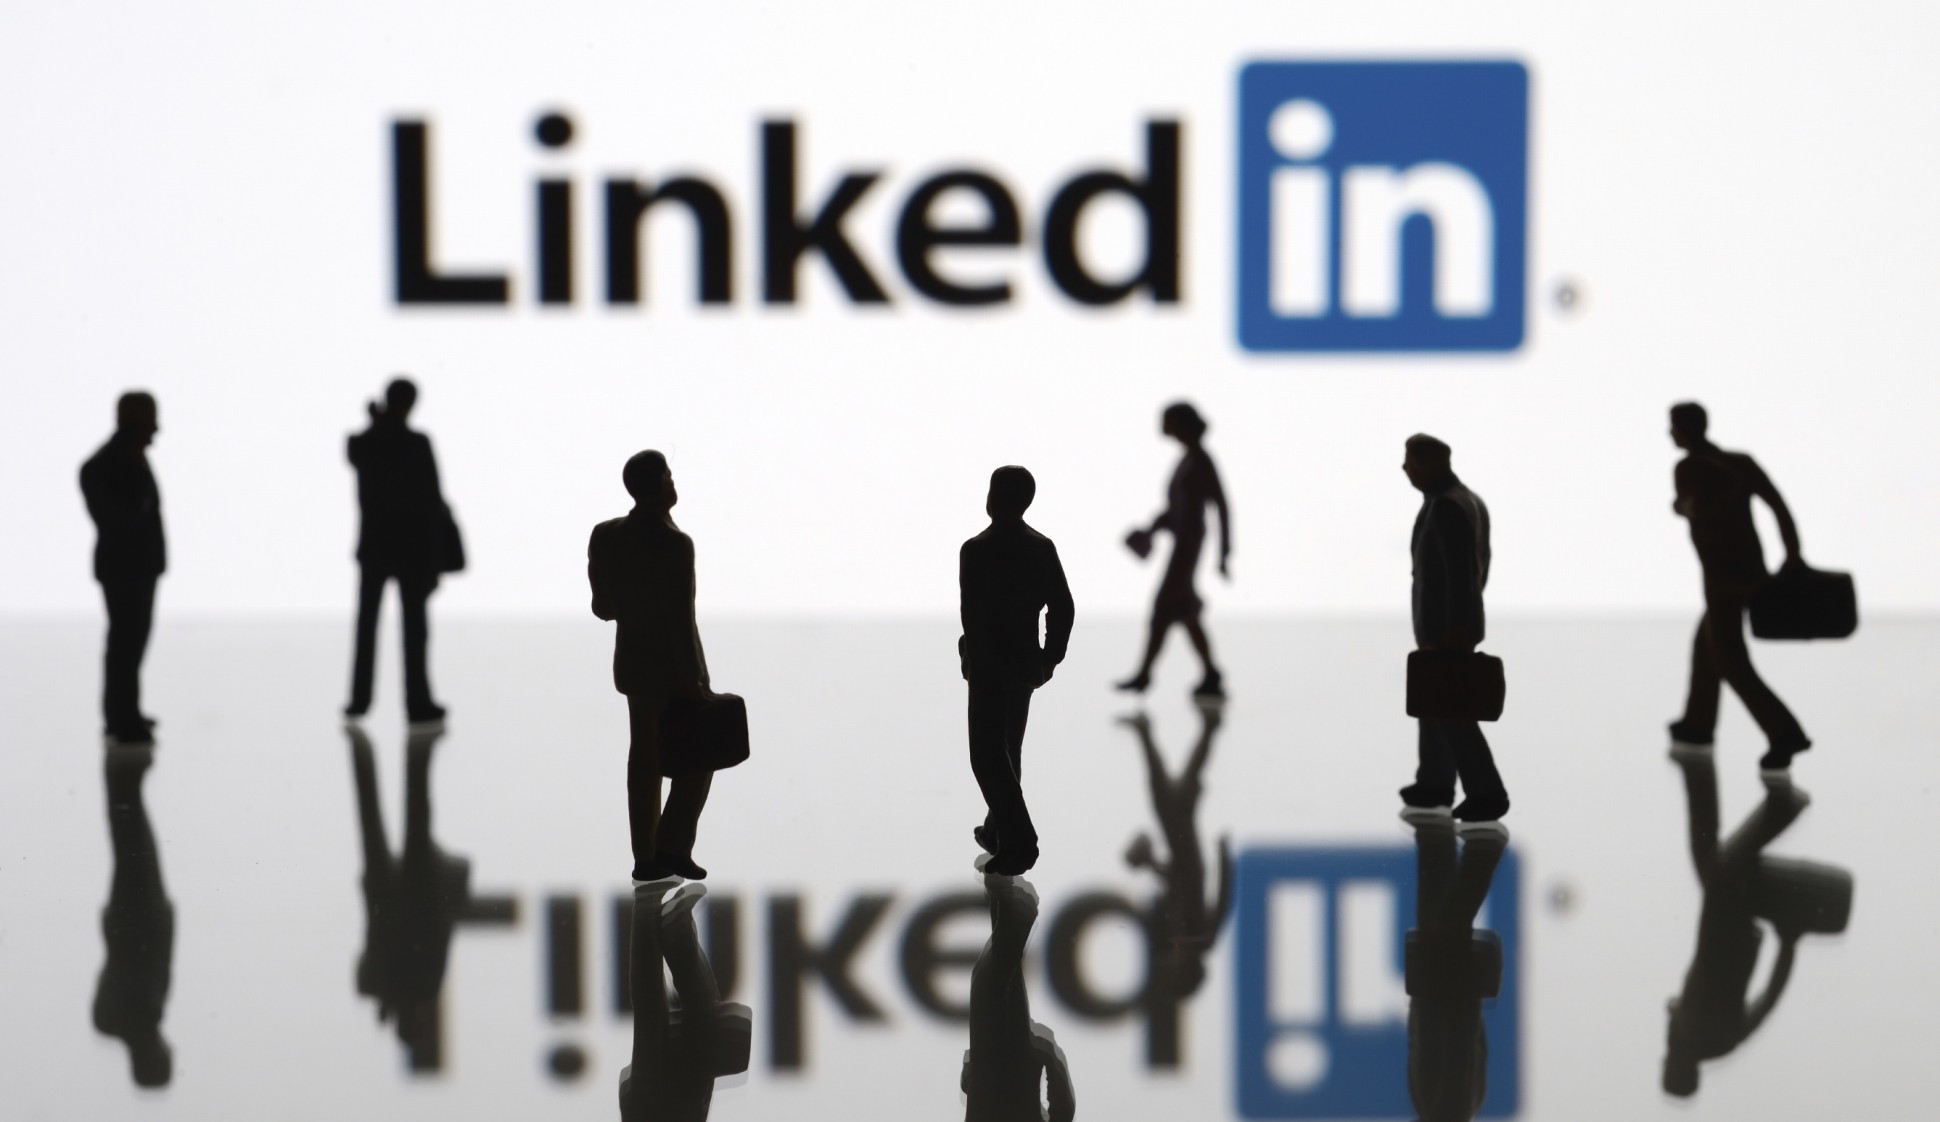

In [3]:
from IPython.display import Image  #importing libary to display the image
import os  #import operating system to direct the folders
Image("/kaggle/input/linkedin/LI-People-1.jpg")

# Loading Dataset
(#by using pandas)

# About Dataset
 This dataset have 3 csv files:
 1. linkedin_skills: it has 1296381 rows  and 2 columns
   * job_link : job details and description
   * job_skills: skills which arae needed for that job
 
 2. linkedin_jobs : it has 1297332 rows and  2 columns
   * job_link : job details and description
   * job_summary: summary of that job and qualifications
   
 3. linkedin_posts: it has 1348454 rows × 14 columns
   * job_link:link of that job profile
   * last_processed_time: process time 
   * got_summary:
   * got_ner:
   * is_being_worked:
   * job_title: title of job
   * company: name of the company providing job
   * job_location: job location
   * first_seen: jobs providing time
   * search_city : city_name
   * search_country: country_name
   * search_position:position of job
   * job_level:level of job
   * job_type:type of the job
 


# Goal of project:
* to know the skills which need for a jobs 
* to know the jobs providing countires and cities
* to know the which skills need to be learn for a specific position
* to get connections with high proffessional employees and expereinced employees
* to know which location providings jobs for our requirment

In [4]:
linkedin_skills=pd.read_csv("/kaggle/input/1-3m-linkedin-jobs-and-skills-2024/job_skills.csv").head()
linkedin_skills

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [5]:
linkedin_jobs=pd.read_csv("/kaggle/input/1-3m-linkedin-jobs-and-skills-2024/job_summary.csv").head()
linkedin_jobs

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...


In [6]:
linkedin_posts=pd.read_csv("/kaggle/input/1-3m-linkedin-jobs-and-skills-2024/linkedin_job_postings.csv")
linkedin_posts

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


# Data Prepartion
*explorings rows and columns*

In [7]:
linkedin_posts.head() #top5 columns of dataset

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [8]:
linkedin_posts.tail(5) #bottom 5  columns of dataset

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite
1348453,https://www.linkedin.com/jobs/view/on-demand-g...,2024-01-21 00:38:44.231492+00,t,t,f,"On-Demand: Guest Advocate (Cashier), General M...",Target,"Culver City, CA",2024-01-12,Malibu,United States,Cashier Ii,Mid senior,Onsite


In [9]:
linkedin_posts.describe()  #gives the summary about the dataset in detailed form

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348454,1348454,1348454,1348454,1348454,1348454,1348443,1348435,1348454,1348454,1348454,1348454,1348454,1348454
unique,1348454,722748,2,2,2,584544,90605,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625540,1297877,1296401,1346978,7325,41598,13436,460035,10052,1149342,19468,1204445,1337633


In [10]:
linkedin_posts.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB


In [11]:
type(linkedin_jobs) #dataset type is  dataframe as it is the combination of  mutlple series 

pandas.core.frame.DataFrame

In [12]:
type(linkedin_jobs["job_link"])  #single column in dataset will be consider as series

pandas.core.series.Series

In [13]:
linkedin_skills.index  #index of dataframe from starting to end range will be shown

RangeIndex(start=0, stop=5, step=1)

In [14]:
linkedin_posts.columns  #columns of the dataframe will be appear

Index(['job_link', 'last_processed_time', 'got_summary', 'got_ner',
       'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type'],
      dtype='object')

In [15]:
linkedin_posts.values #values in dataframe will appear

array([['https://www.linkedin.com/jobs/view/account-executive-dispensing-norcal-northern-nevada-becton-dickinson-at-bd-3802078767',
        '2024-01-21 07:12:29.00256+00', 't', ..., 'Color Maker',
        'Mid senior', 'Onsite'],
       ['https://www.linkedin.com/jobs/view/registered-nurse-rn-care-manager-at-trinity-health-mi-3803386312',
        '2024-01-21 07:39:58.88137+00', 't', ...,
        'Director Nursing Service', 'Mid senior', 'Onsite'],
       ['https://www.linkedin.com/jobs/view/restaurant-supervisor-the-forklift-at-wasatch-adaptive-sports-3771464419',
        '2024-01-21 07:40:00.251126+00', 't', ..., 'Stand-In',
        'Mid senior', 'Onsite'],
       ...,
       ['https://www.linkedin.com/jobs/view/executive-chef-operations-support-at-nexdine-hospitality-3739779610',
        '2024-01-21 07:40:00.304641+00', 't', ..., 'Chef', 'Mid senior',
        'Onsite'],
       ['https://www.linkedin.com/jobs/view/rn-registered-nurse-analyst-23934913expplat-at-travelnursesource-380220

In [16]:
linkedin_posts.set_index('company',inplace=True)#for setting customized index

In [17]:
linkedin_posts.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
company,,,,,,,,,,,,,
BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
"IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [18]:
linkedin_posts.reset_index(inplace=True)

# Data cleaning
*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

# benfitis of data cleaning

* Error free data
* Acurracy and effiency
* Data quality
* Data consistency

In [19]:
mask=linkedin_posts.isnull()  #isnullfunctions checks for null in dataset and gives boolean output 
linkedin_posts[mask]     #mask is variable which stores True values
# in this dataset doesnt have any null values so it showing NaN

,company,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1348452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print(linkedin_posts.isnull().sum()) # null values in some columns(company and job_location)

company                11
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64


* NOTE : [if nulls are present in dataset then treat them with fillna() or dropna()]

In [21]:
linkedin_posts["company"].value_counts()

company
Health eCareers            41598
Jobs for Humanity          27680
TravelNurseSource          16142
Dollar General             14815
PracticeLink                9738
                           ...  
Gravity Recruit Limited        1
Winkle Custom Homes            1
Banco                          1
Shred-it                       1
BIX Produce                    1
Name: count, Length: 90605, dtype: int64

In [22]:
linkedin_posts["job_location"].value_counts()

job_location
New York, NY                                   13436
London, England, United Kingdom                11761
Houston, TX                                    10999
Chicago, IL                                    10790
Los Angeles, CA                                10262
                                               ...  
Eynsford, England, United Kingdom                  1
Brock, TX                                          1
Lake Park, IA                                      1
Roebling, NJ                                       1
Yallabatharra, Western Australia, Australia        1
Name: count, Length: 29153, dtype: int64

In [23]:
linkedin_posts["company"]=linkedin_posts["company"].fillna("Banco") #filling null values with random company name in dataset to get nill free data

In [24]:
linkedin_posts["job_location"]=linkedin_posts["job_location"].fillna("Lake Park, IA")#filling null values with random location name in dataset to get nill free data

In [25]:
print(linkedin_posts.isnull().sum()) #no null values #error and null free data 

company                0
job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64


In [26]:
del linkedin_posts["got_summary"] #deleting  unnesccesary column 

In [27]:
del linkedin_posts["got_ner"] #deleting unneccesary column 

In [28]:
del linkedin_posts["is_being_worked"] #deleting unneccesary column 

In [29]:
linkedin_posts.duplicated(subset=["company","job_link","last_processed_time","job_title","job_location","first_seen","search_city","search_country","search_position","job_level","job_type"])
#checks for duplicates in this dataset

0          False
1          False
2          False
3          False
4          False
           ...  
1348449    False
1348450    False
1348451    False
1348452    False
1348453    False
Length: 1348454, dtype: bool

In [30]:
# if there is duplicates treat it with drop_dupliacates for error free dataset
#checks for duplicates in this dataset
linkedin_posts.drop_duplicates(subset=["company","job_link","last_processed_time","job_title","job_location","first_seen","search_city","search_country","search_position","job_level","job_type"],inplace=True)
#checks for duplicates in this dataset
len(linkedin_posts)   #the length before drop duplicates and after is same therefore there are no dupliacates in dataset
#if length and drop duplicates changes then there are duplicates

1348454

In [31]:
linkedin_jobs["job_link"].unique()  #give the unique  array in dataset  with respect to column given

array(['https://www.linkedin.com/jobs/view/restaurant-manager-at-rock-n-roll-sushi-3805551344',
       'https://www.linkedin.com/jobs/view/med-surg-registered-nurse-rn-at-touchette-regional-hospital-3732389852',
       'https://www.linkedin.com/jobs/view/registered-nurse-cath-lab-at-stonesprings-hospital-center-3799543261',
       'https://uk.linkedin.com/jobs/view/commercial-account-executive-at-the-recruit-lab-3805254225',
       'https://www.linkedin.com/jobs/view/store-manager-at-stop-shop-3782135496'],
      dtype=object)

In [32]:
linkedin_posts.nunique()  #give the count of unique numbers in dataset by columns vise

company                  90605
job_link               1348454
last_processed_time     722748
job_title               584544
job_location             29153
first_seen                   6
search_city               1018
search_country               4
search_position           1993
job_level                    2
job_type                     3
dtype: int64

In [33]:
linkedin_posts["first_seen"].unique()  #give the unique  array in dataset  with respect to column given

array(['2024-01-15', '2024-01-14', '2024-01-16', '2024-01-17',
       '2024-01-13', '2024-01-12'], dtype=object)

 # Data performing:
the process of systematically applying the statstical,numerical and logic techinques to describe and illustrate and evaluate data

In [34]:
linkedin_posts.shape  #shape of dataframe 

(1348454, 11)

In [35]:
linkedin_posts.size  #gives the size of dataframe

14832994

In [36]:
linkedin_jobs.ndim  #this dataframe is 2d array

2

#  Exploratory Data  Analysis & Visualization
* EDA plays an important role in Data Analysis
* Explanatory data analytics focuses on all the parts of context, mainly the why and how. An outcome can be statistically calculated, modeled, or visualized to tell you the likelihood of certain events based on preconceived variables.

In [37]:
linkedin_posts.iloc[20:30:2]  #accesing dataframes with iloc accessor where range is excluive 

,company,job_link,last_processed_time,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
20,Charter Schools USA,https://www.linkedin.com/jobs/view/custodial-s...,2024-01-21 02:01:20.607029+00,Custodial Supervisor - Palm Beach Area,"West Palm Beach, FL",2024-01-14,Palm Springs,United States,Charter,Mid senior,Onsite
22,LHC Group,https://www.linkedin.com/jobs/view/rn-executiv...,2024-01-21 07:12:34.963881+00,RN Executive Director Hospice,"Wytheville, VA",2024-01-14,Bluefield,United States,Director Nursing Service,Mid senior,Onsite
24,Northrop Grumman,https://www.linkedin.com/jobs/view/test-conduc...,2024-01-21 06:01:19.472942+00,Test Conductor - Space Systems,"Gilbert, AZ",2024-01-15,Chandler,United States,Conductor,Mid senior,Onsite
26,Shaw Industries,https://www.linkedin.com/jobs/view/builder-ter...,2024-01-21 06:01:12.676071+00,"Builder Territory Manager - Seattle , WA","Seattle, WA",2024-01-16,Bellevue,United States,Exhibit Builder,Mid senior,Onsite
28,Knight Dragon Ltd,https://uk.linkedin.com/jobs/view/property-man...,2024-01-21 06:01:13.56896+00,Property Manager,"Royal Borough of Greenwich, England, United Ki...",2024-01-14,Basildon,United Kingdom,River,Mid senior,Onsite


In [38]:
linkedin_posts[5:15:2]  #slicing[start:stop:step]

,company,job_link,last_processed_time,job_title,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
5,ICL,https://www.linkedin.com/jobs/view/counselor-0...,2024-01-19 09:45:09.215838+00,Counselor-07532802,"Brooklyn, NY",2024-01-16,Oyster Bay,United States,Residence Counselor,Mid senior,Onsite
7,Creative Financial Staffing (CFS),https://www.linkedin.com/jobs/view/part-time-h...,2024-01-21 08:08:19.912883+00,Part Time- HR Generalist,"New York, NY",2024-01-16,White Plains,United States,Human Resource Advisor,Mid senior,Onsite
9,Shared Health-Soins Communs,https://ca.linkedin.com/jobs/view/engineering-...,2024-01-21 08:08:20.998834+00,Engineering Project Coordinator,"Winnipeg, Manitoba, Canada",2024-01-14,Manitoba,Canada,Program Coordinator,Mid senior,Onsite
11,ICON plc,https://www.linkedin.com/jobs/view/manager-sit...,2024-01-21 08:08:22.631819+00,"Manager, Site Operations","Knoxville, TN",2024-01-14,Louisville,United States,Vendor,Mid senior,Onsite
13,Olsson,https://www.linkedin.com/jobs/view/control-sys...,2024-01-21 08:08:24.021822+00,Control Systems Integration Engineer,"Lincoln, NE",2024-01-14,Nebraska,United States,Solutions Operator,Associate,Onsite


In [39]:
linkedin_posts.set_index(["job_title","job_location"],inplace=True)
linkedin_posts#multi level indexing where platform acts as parental hireacy job_title and job_location acts as child hireachy level indexing


,,company,job_link,last_processed_time,first_seen,search_city,search_country,search_position,job_level,job_type
job_title,job_location,,,,,,,,,
Account Executive - Dispensing (NorCal/Northern Nevada) - Becton Dickinson,"San Diego, CA",BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
Registered Nurse - RN Care Manager,"Norton Shores, MI",Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
Independent Real Estate Agent,"Englewood Cliffs, NJ",Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
Group/Unit Supervisor (Systems Support Manager TSS),"Chamblee, GA","IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...
Registered Nurse (RN) #CP-RN-7998660 - 24116274EXPPLAT /,"Providence, RI",TravelNurseSource,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
Construction Superintendent,"New Iberia, LA",Jobot,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
"Executive Chef, Operations Support","Riverhead, NY",NEXDINE Hospitality,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,2024-01-14,Eastport,United States,Chef,Mid senior,Onsite


In [40]:
linkedin_posts.reset_index(inplace=True)

In [41]:
pd.set_option("display.date_dayfirst", True)

In [42]:
linkedin_posts["time"] = pd.to_datetime(linkedin_posts["last_processed_time"],dayfirst=True, format='mixed')
print(linkedin_posts["time"])
# Timestamp


0         2024-01-21 07:12:29.002560+00:00
1         2024-01-21 07:39:58.881370+00:00
2         2024-01-21 07:40:00.251126+00:00
3         2024-01-21 07:40:00.308133+00:00
4         2024-01-19 09:45:09.215838+00:00
                        ...               
1348449   2024-01-20 15:21:07.786118+00:00
1348450   2024-01-20 15:21:10.885264+00:00
1348451   2024-01-21 07:40:00.304641+00:00
1348452   2024-01-21 00:38:39.816821+00:00
1348453   2024-01-21 00:38:44.231492+00:00
Name: time, Length: 1348454, dtype: datetime64[ns, UTC]


In [43]:
linkedin_posts["dates"] = pd.to_datetime(linkedin_posts["last_processed_time"],dayfirst=True, format='mixed')
print(linkedin_posts["dates"])
# Timestamp


0         2024-01-21 07:12:29.002560+00:00
1         2024-01-21 07:39:58.881370+00:00
2         2024-01-21 07:40:00.251126+00:00
3         2024-01-21 07:40:00.308133+00:00
4         2024-01-19 09:45:09.215838+00:00
                        ...               
1348449   2024-01-20 15:21:07.786118+00:00
1348450   2024-01-20 15:21:10.885264+00:00
1348451   2024-01-21 07:40:00.304641+00:00
1348452   2024-01-21 00:38:39.816821+00:00
1348453   2024-01-21 00:38:44.231492+00:00
Name: dates, Length: 1348454, dtype: datetime64[ns, UTC]


In [44]:
linkedin_posts["times"]= pd.to_datetime(linkedin_posts["time"]).dt.time #using to_datetime to converts time and date

In [45]:
linkedin_posts["Date"]= pd.to_datetime(linkedin_posts["dates"]).dt.date #using to_datetime to converts time and date

In [46]:
linkedin_posts.head()

,job_title,job_location,company,job_link,last_processed_time,first_seen,search_city,search_country,search_position,job_level,job_type,time,dates,times,Date
0,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,2024-01-21 07:12:29.002560+00:00,2024-01-21 07:12:29.002560+00:00,07:12:29.002560,2024-01-21
1,Registered Nurse - RN Care Manager,"Norton Shores, MI",Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,2024-01-21 07:39:58.881370+00:00,2024-01-21 07:39:58.881370+00:00,07:39:58.881370,2024-01-21
2,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,2024-01-21 07:40:00.251126+00:00,2024-01-21 07:40:00.251126+00:00,07:40:00.251126,2024-01-21
3,Independent Real Estate Agent,"Englewood Cliffs, NJ",Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,2024-01-21 07:40:00.308133+00:00,2024-01-21 07:40:00.308133+00:00,07:40:00.308133,2024-01-21
4,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA","IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,2024-01-19 09:45:09.215838+00:00,2024-01-19 09:45:09.215838+00:00,09:45:09.215838,2024-01-19


In [47]:
del linkedin_posts["last_processed_time"] #deleting  unnesccesary column  for easy analysis

In [48]:
del linkedin_posts["dates"] #deleting  unnesccesary column  for easy analysis

In [49]:
del linkedin_posts["time"] #deleting  unnesccesary column  for easy analysis

In [50]:
linkedin_posts.head()

,job_title,job_location,company,job_link,first_seen,search_city,search_country,search_position,job_level,job_type,times,Date
0,Account Executive - Dispensing (NorCal/Norther...,"San Diego, CA",BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,07:12:29.002560,2024-01-21
1,Registered Nurse - RN Care Manager,"Norton Shores, MI",Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,07:39:58.881370,2024-01-21
2,RESTAURANT SUPERVISOR - THE FORKLIFT,"Sandy, UT",Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,07:40:00.251126,2024-01-21
3,Independent Real Estate Agent,"Englewood Cliffs, NJ",Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,07:40:00.308133,2024-01-21
4,Group/Unit Supervisor (Systems Support Manager...,"Chamblee, GA","IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,09:45:09.215838,2024-01-19


In [51]:
linkedin_posts["job_title"]=linkedin_posts["job_title"].str.lower().str.strip()  # as there is so much of space between country  names strip it will be helpful to remove space

# Data visuvalization

# Question and Answers
* by using different libararies to perform EDA and VISUALIZATION

# 1.provide the list of top 20 jobs present in linkedin profiles?

In [52]:
top_jobs=linkedin_posts["job_title"].value_counts().head(10)
top_jobs

job_title
customer service representative                        9436
lead sales associate-ft                                7325
shift manager                                          5849
store manager                                          5748
assistant manager                                      5540
first year tax professional                            5356
lead sales associate-pt                                4924
registered nurse                                       4336
hourly supervisor & training                           2955
travel allied health professional - ct technologist    2933
Name: count, dtype: int64

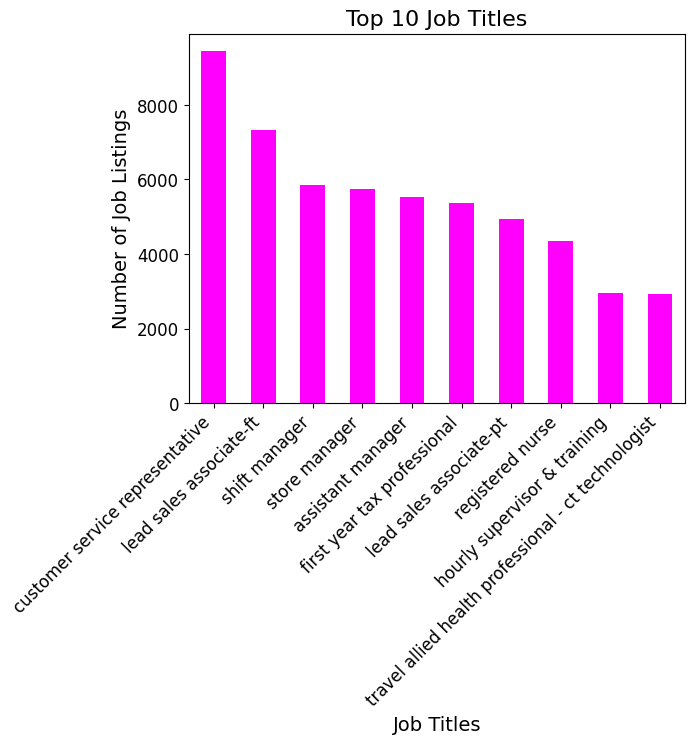

<Figure size 800x1200 with 0 Axes>

In [53]:
top_jobs.plot(kind="bar",color="magenta")
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(8, 12))
plt.show()

# 2.when did most of the proccessing timme of jobs done in a week?


In [54]:
linkedin_posts["Date"]= pd.to_datetime(linkedin_posts["Date"]) #converting string into date 


linkedin_posts["day"]=linkedin_posts["Date"].dt.day #SEPARTING DAY from the date colum
linkedin_posts["day of week"] = linkedin_posts["Date"].dt.day_name() #getting name of the day in a week 

In [55]:
linkedin_posts.reset_index(inplace=True)

In [56]:
linkedin_posts.head()

,index,job_title,job_location,company,job_link,first_seen,search_city,search_country,search_position,job_level,job_type,times,Date,day,day of week
0,0,account executive - dispensing (norcal/norther...,"San Diego, CA",BD,https://www.linkedin.com/jobs/view/account-exe...,2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,07:12:29.002560,2024-01-21,21,Sunday
1,1,registered nurse - rn care manager,"Norton Shores, MI",Trinity Health MI,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,07:39:58.881370,2024-01-21,21,Sunday
2,2,restaurant supervisor - the forklift,"Sandy, UT",Wasatch Adaptive Sports,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,07:40:00.251126,2024-01-21,21,Sunday
3,3,independent real estate agent,"Englewood Cliffs, NJ",Howard Hanna | Rand Realty,https://www.linkedin.com/jobs/view/independent...,2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,07:40:00.308133,2024-01-21,21,Sunday
4,4,group/unit supervisor (systems support manager...,"Chamblee, GA","IRS, Office of Chief Counsel",https://www.linkedin.com/jobs/view/group-unit-...,2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,09:45:09.215838,2024-01-19,19,Friday


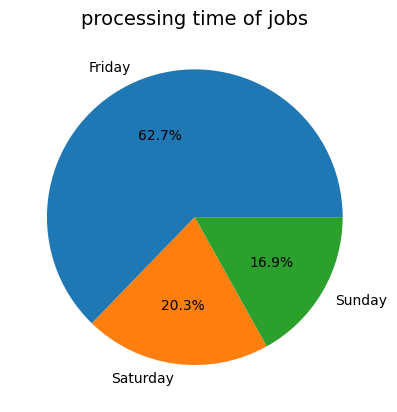

In [57]:

processing_time=linkedin_posts["day of week"].value_counts()

plt.pie(x=processing_time,labels=processing_time.index,autopct="%1.1f%%") #plotting pie chart to get the visualization of top 10 resturant types
plt.title("processing time of jobs",fontsize=14)
plt.show()

# 3.provide the list of top companines which provides job openings in linkedin?

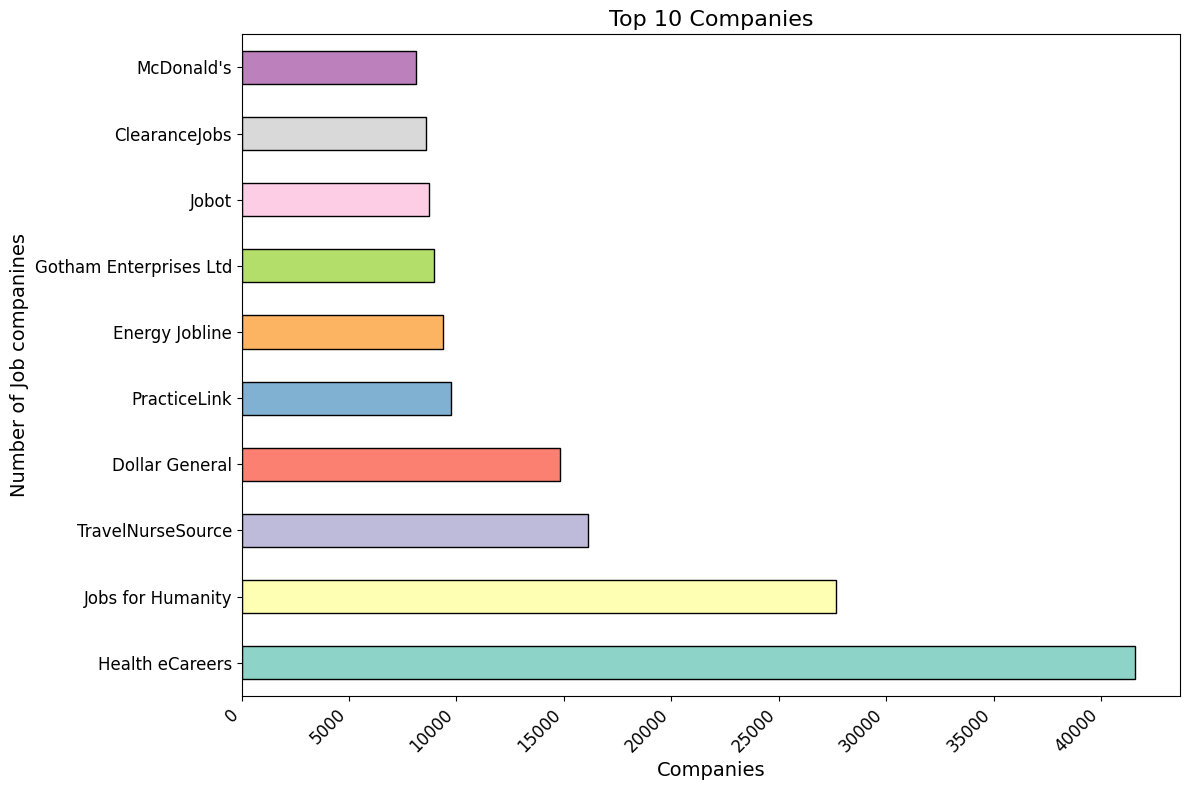

In [58]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(linkedin_posts['company'].unique()))  # You can choose a different color palette

top_companies = linkedin_posts['company'].value_counts().head(10)
top_companies.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Top 10 Companies', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Number of Job companines', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 4.plot the possible graphs of the bottom 10 companines in data set?

In [59]:
start_up =linkedin_posts.tail(10)
start_up

,index,job_title,job_location,company,job_link,first_seen,search_city,search_country,search_position,job_level,job_type,times,Date,day,day of week
1348444,1348444,social media content executive,"Manchester, England, United Kingdom",Citation,https://uk.linkedin.com/jobs/view/social-media...,2024-01-14,Warrington,United Kingdom,Stand-In,Mid senior,Onsite,15:20:49.415128,2024-01-20,20,Saturday
1348445,1348445,integrated behavioral health psychologist - te...,"St Cloud, MN",CentraCare,https://www.linkedin.com/jobs/view/integrated-...,2024-01-16,Minnesota,United States,Psychiatric Technician,Mid senior,Onsite,15:20:50.127933,2024-01-20,20,Saturday
1348446,1348446,independent living adviser,"Birmingham, England, United Kingdom",Flux Power,https://uk.linkedin.com/jobs/view/independent-...,2024-01-14,Swindon,United Kingdom,Change Person,Mid senior,Onsite,15:20:50.837387,2024-01-20,20,Saturday
1348447,1348447,talend senior engineer,"Berkeley Heights, NJ",Trinity IT Services,https://www.linkedin.com/jobs/view/talend-seni...,2024-01-14,Bound Brook,United States,Value Engineer,Mid senior,Onsite,15:20:51.325250,2024-01-20,20,Saturday
1348448,1348448,associate account manager,"Minneapolis, MN",Lockton,https://www.linkedin.com/jobs/view/associate-a...,2024-01-15,Lake Forest,United States,Director Athletic,Mid senior,Onsite,15:20:54.320330,2024-01-20,20,Saturday
1348449,1348449,registered nurse (rn) #cp-rn-7998660 - 2411627...,"Providence, RI",TravelNurseSource,https://www.linkedin.com/jobs/view/registered-...,2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,15:21:07.786118,2024-01-20,20,Saturday
1348450,1348450,construction superintendent,"New Iberia, LA",Jobot,https://www.linkedin.com/jobs/view/constructio...,2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,15:21:10.885264,2024-01-20,20,Saturday
1348451,1348451,"executive chef, operations support","Riverhead, NY",NEXDINE Hospitality,https://www.linkedin.com/jobs/view/executive-c...,2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,07:40:00.304641,2024-01-21,21,Sunday
1348452,1348452,"rn- registered nurse, analyst - - 23934913expp...","Aurora, CO",TravelNurseSource,https://www.linkedin.com/jobs/view/rn-register...,2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,00:38:39.816821,2024-01-21,21,Sunday
1348453,1348453,"on-demand: guest advocate (cashier), general m...","Culver City, CA",Target,https://www.linkedin.com/jobs/view/on-demand-g...,2024-01-12,Malibu,United States,Cashier Ii,Mid senior,Onsite,00:38:44.231492,2024-01-21,21,Sunday


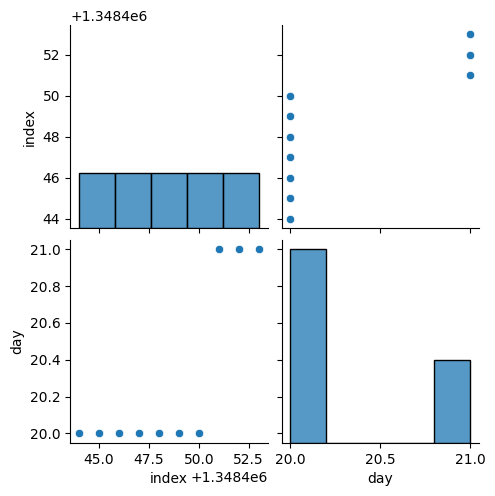

In [60]:
sns.pairplot(start_up)
plt.show()

# 5. provide  how many number of jobs having  different job types in linkedin?

In [61]:
job_type=linkedin_posts["job_type"].value_counts()
job_type

job_type
Onsite    1337633
Hybrid       6562
Remote       4259
Name: count, dtype: int64

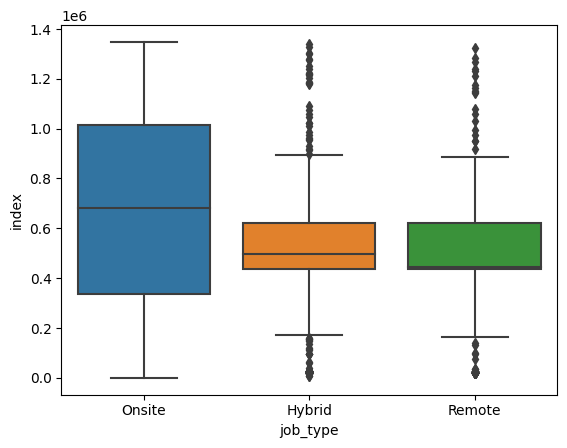

In [62]:
sns.boxplot(x="job_type",y="index",data=linkedin_posts)
plt.show()

# 6. provide  how many number of jobs positions having  different jobs in linkedin?

In [63]:
level=linkedin_posts['job_level'].value_counts()
level

job_level
Mid senior    1204445
Associate      144009
Name: count, dtype: int64

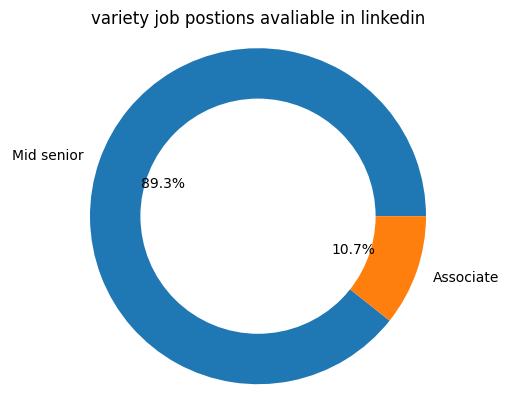

In [64]:

plt.pie(level,labels=level.index,autopct='%1.1f%%')
cen_cir=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cen_cir)
plt.axis('equal')
plt.title('variety job postions avaliable in linkedin')
plt.show()

# 7.Recommend the top job locations present in linkedin for working?

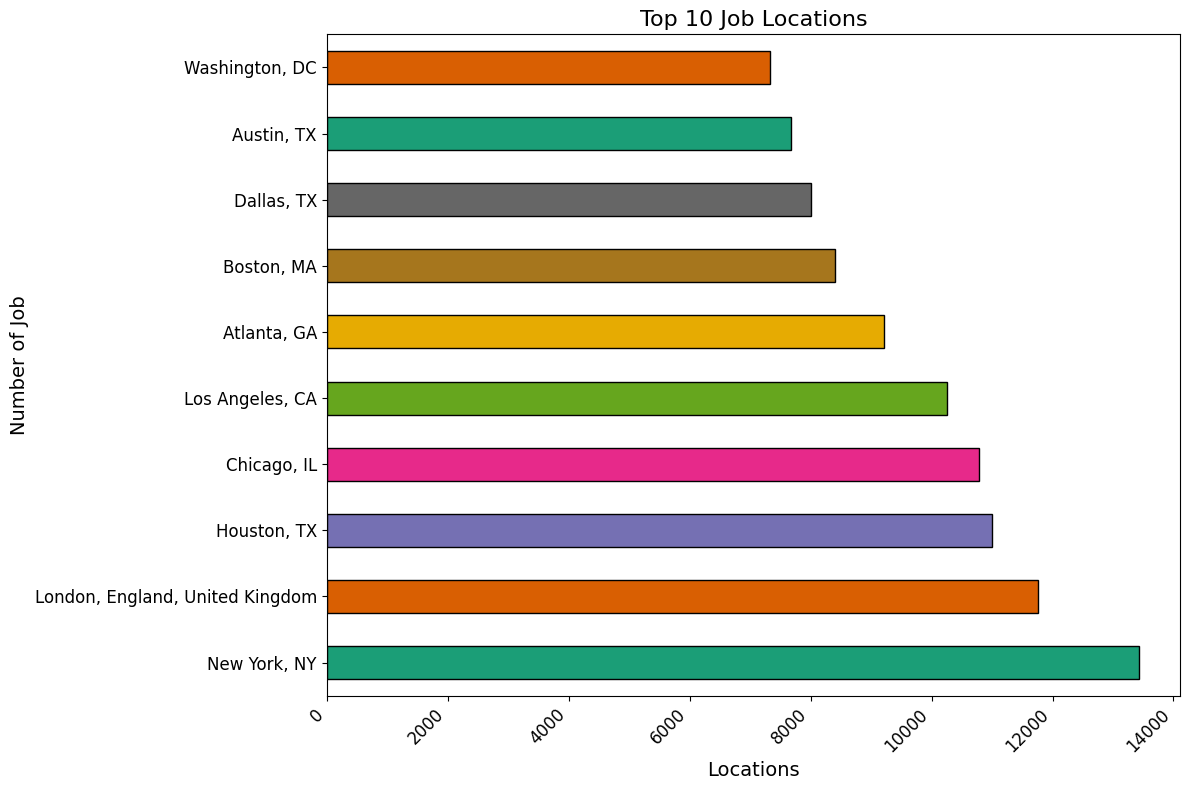

In [65]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Dark2', len(linkedin_posts['job_location'].unique()))  # You can choose a different color palette

top_loc= linkedin_posts['job_location'].value_counts().head(10)
top_loc.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Top 10 Job Locations', fontsize=16)
plt.xlabel('Locations', fontsize=14)
plt.ylabel('Number of Job', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# 8.whats the best timings of job openings in linkedin?

In [66]:
time=linkedin_posts["times"].value_counts().head(15)
time

times
09:45:09.215838    625540
00:14:50.071532         2
12:59:15.206461         2
12:35:49.097890         2
16:38:05.891354         2
04:48:43.273660         2
16:55:00.593345         2
17:08:02.479072         2
21:56:09.767440         2
14:33:18.720985         2
16:14:02.335435         2
17:09:04.503886         2
06:55:17.998620         2
05:28:28.343377         2
12:29:06.599555         2
Name: count, dtype: int64

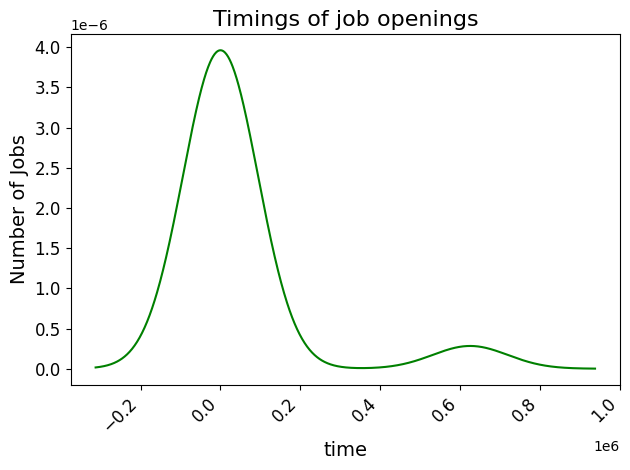

In [67]:
time.plot(kind='kde', color="g")
plt.title('Timings of job openings', fontsize=16)
plt.xlabel('time', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 9.plot the violin plot on the basis of job opening day in month?

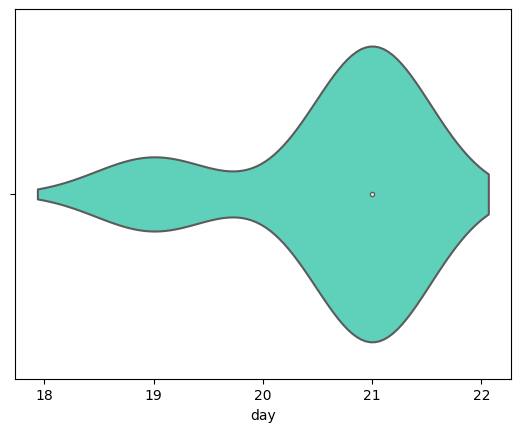

In [68]:
sns.violinplot(x=linkedin_posts["day"].head(10),color="#4CE4C6")
plt.show()

* 21st of every months job openings are more often and job placements.

# 10.plot the histplot with respect to various positions to be searched by users of linkedin to get jobs ?

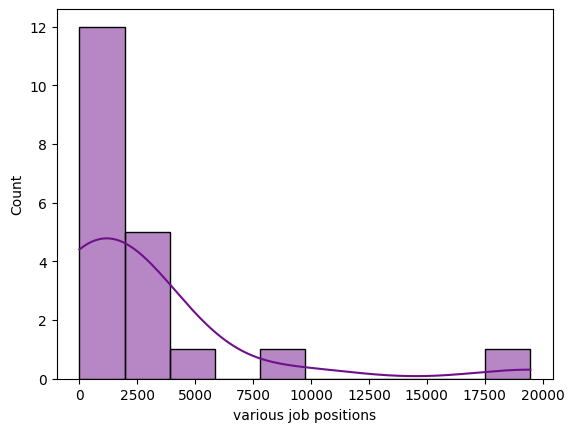

In [69]:
sns.histplot(linkedin_posts.groupby('search_position').index.agg(len).head(20),kde=True ,
             color='#6F108B', edgecolor='k',
            # stat = 'probability'
            )
plt.xlabel('various job positions')
plt.show()

# 11.list out the skills which are least needed for jobs ?

In [70]:
skills=linkedin_skills["job_skills"].value_counts().tail(5)
skills

job_skills
Building Custodial Services, Cleaning, Janitorial Services, Materials Handling, Housekeeping, Sanitation, Waste Management, Floor Maintenance, Equipment Maintenance, Safety Protocols, Communication Skills, Attention to Detail, Physical Strength, Experience in Housekeeping                                                                                                                                                                                                                                                                                                                                                                                                                                1
Customer service, Restaurant management, Food safety, Training, Supervision, Scheduling, Inventory, Cost control, Sales, Communication, Problemsolving, Leadership, Motivation, Teamwork, High School Diploma, Bachelor's Degree, ServSafe Certification, Valid Driver's License, Physical ability to perfo

# SUMMARY:
* good way to network
* linkedin used to build easy connections with recuriters
* updating skills and resume will lead to fast recuriting
* freshers can know the all list of jobs and can easily apply to those positions
* easily understanding the types and positions of various jobs online
* better oppurnities of internships and jobs.
we can say that above 1.3 million people are using linkedin for job and learning purpose in world ..linkedin is an useful social media platfoems fro both recuriters and job seekers .
